In [1]:
import numpy as np
import librosa as rosa
from librosa import *
import librosa.display
import scipy.fft
import scipy.io.wavfile
import tqdm
from matplotlib import pyplot as plt
plt.style.use("solarized-light")

In [2]:
fn = "./ick-la-1"

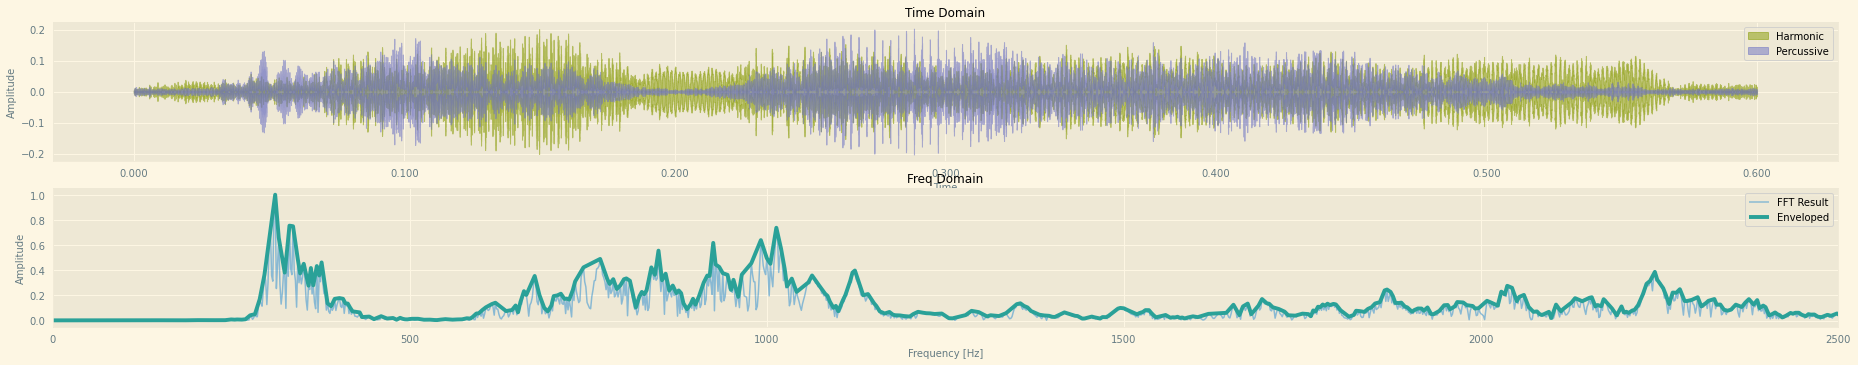

In [3]:
with plt.rc_context({"figure.figsize": [ 32, 5.6 ]}):
    sample, fs = rosa.load(fn + ".wav")
    plt.subplot(211)
    for each in zip(rosa.effects.hpss(sample), [ 2, 7 ], [ .5, .5 ], ["Harmonic", "Percussive"]):
        rosa.display.waveshow(each[0], sr=fs, color=list(plt.rcParams["axes.prop_cycle"])[each[1]]["color"], alpha=each[2], label=each[3])
    plt.legend()
    plt.ylabel("Amplitude")
    plt.title("Time Domain")
    plt.subplot(212)
    x_fft = scipy.fft.fftfreq(len(sample), 1 / 22050)
    y_fft = np.abs(scipy.fft.fft(sample))
    y_fft /= y_fft.max()
    x_fft = scipy.fft.fftshift(x_fft)
    y_fft = scipy.fft.fftshift(y_fft)
    plt.plot(x_fft, y_fft, alpha=.5, label="FFT Result")
    peaksidx = scipy.signal.find_peaks(y_fft)[0].tolist()
    with plt.rc_context({"lines.linewidth": 3.9}):
        plt.plot(x_fft[peaksidx], y_fft[peaksidx], label="Enveloped")
    plt.legend()
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.xlim(0, 2500)
    plt.title("Freq Domain")
    plt.show()

In [4]:
ichika_la_raw, fs = rosa.load(fn + ".wav")
ichika_la = ichika_la_raw[ 5512 : (-1103) ].flatten()

In [5]:
#y_third = rosa.effects.pitch_shift(ichika_la, sr=fs, n_steps=4)

In [6]:
#wavfile.write(fn + "-shifted.wav", fs, y_third) # 可能需要重新录制该音节

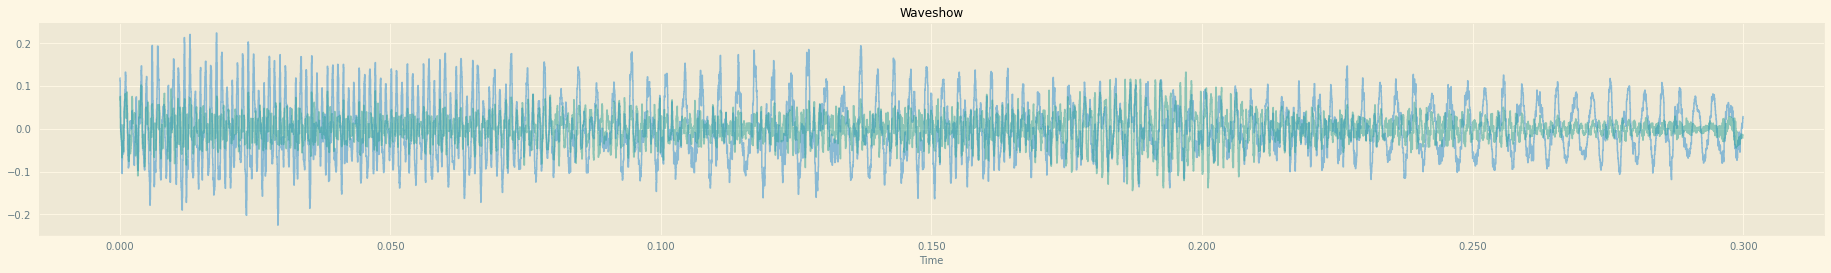

In [7]:
with plt.rc_context({"figure.figsize": [ 32, 3.9 ]}):
    for each in zip(rosa.effects.hpss(ichika_la), ["Harmonic", "Percussive"]):
        rosa.display.waveshow(each[0], sr=fs, alpha=.5, label=each[1])
    plt.title("Waveshow")
    """
    for each in zip([ 312, 313 ], rosa.effects.hpss(ichika_la), ["Harmonic", "Percussive"]):
        plt.subplot(each[0])
        rosa.display.waveshow(each[1], sr=fs)
        plt.title(each[2])
    """
    plt.show()

In [8]:
x_fft = scipy.fft.fftfreq(len(ichika_la), 1 / 22050)
y_fft_complex = scipy.fft.fft(ichika_la)
y_fft = np.abs(y_fft_complex)
y_fft_max_abs = y_fft.max()
y_fft /= y_fft_max_abs
# Shifting
x_fft = scipy.fft.fftshift(x_fft)
y_fft = scipy.fft.fftshift(y_fft)

In [9]:
idx_max, x_max, y_max = 0, 0, 0
for idx in range(len(x_fft) // 2, len(x_fft)):
    if y_fft[idx] > y_max:
        idx_max = idx
        x_max = x_fft[idx]
        y_max = y_fft[idx]

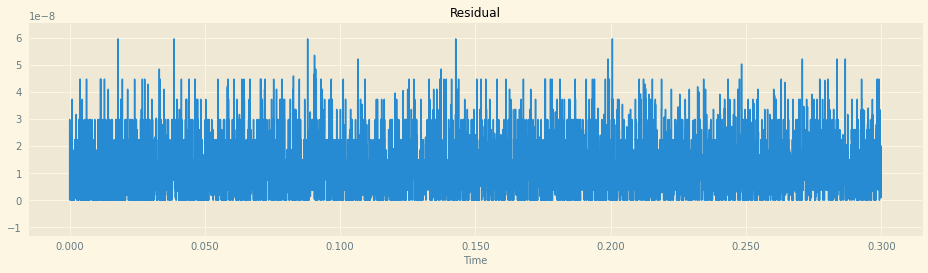

True

In [10]:
with plt.rc_context({"figure.figsize": [ 16, 3.9 ]}):
    ichika_la_pred = scipy.fft.ifft(y_fft_complex).real
    """
    plt.subplot(211)
    rosa.display.waveshow(ichika_la, sr=fs, alpha=.5, label="Raw Audio")
    rosa.display.waveshow(ichika_la_pred, sr=fs, alpha=.5, label="Raw Audio")
    plt.subplot(212)
    """
    rosa.display.waveshow(np.abs(ichika_la_pred - ichika_la), sr=fs)
    plt.title("Residual")
    plt.ylim(ymin=-1.28e-8)
    plt.show()
np.allclose(ichika_la_pred, ichika_la, atol=1e-7)

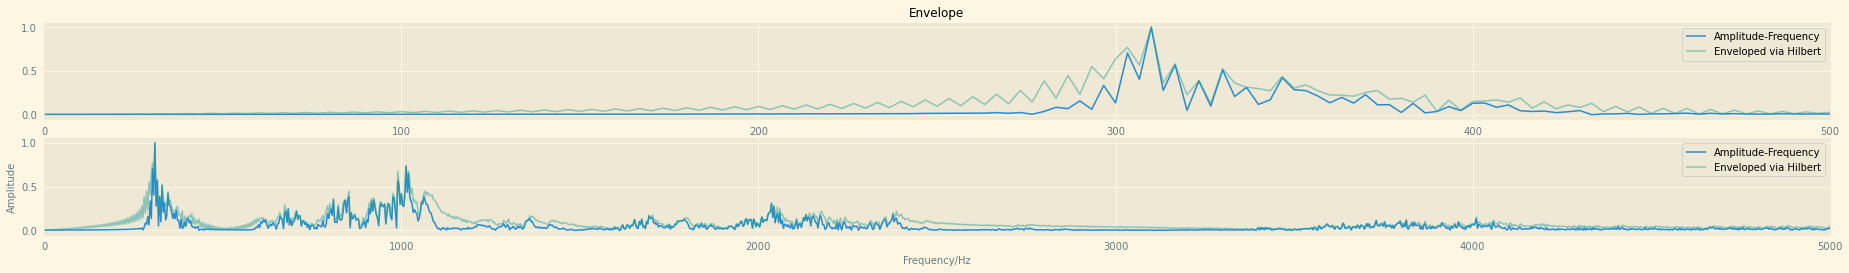

In [11]:
with plt.rc_context({"figure.figsize": [ 32, 3.9 ]}):
    timearray = np.arange(len(ichika_la))
    plt.subplot(211)
    plt.plot(x_fft, y_fft, label="Amplitude-Frequency")
    plt.plot(x_fft, np.abs(scipy.signal.hilbert(y_fft)), alpha=.5, label="Enveloped via Hilbert")
    plt.xlim(0, 500)
    plt.title("Envelope")
    plt.legend()
    plt.subplot(212)
    plt.plot(x_fft, y_fft, label="Amplitude-Frequency")
    plt.plot(x_fft, np.abs(scipy.signal.hilbert(y_fft)), alpha=.5, label="Enveloped via Hilbert")
    plt.xlim(0, 5000)
    plt.xlabel("Frequency/Hz")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

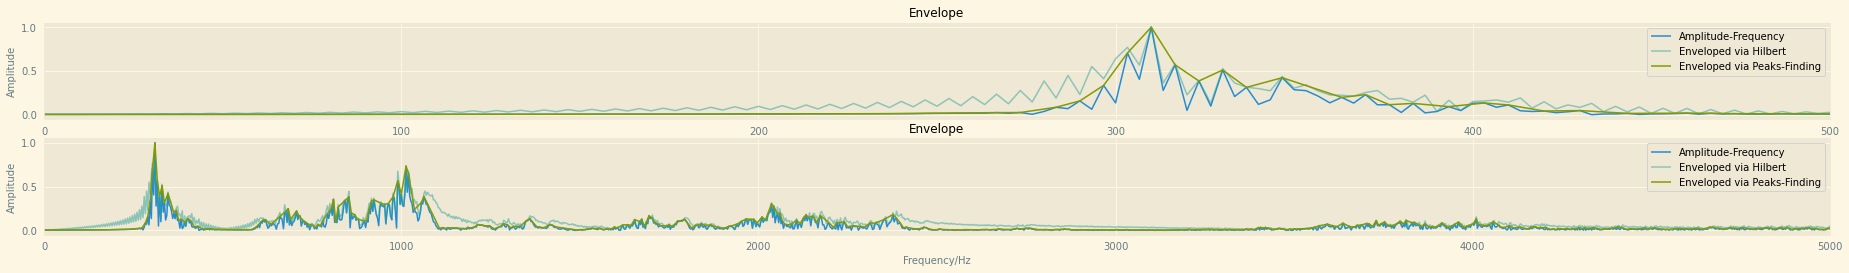

In [12]:
with plt.rc_context({"figure.figsize": [ 32, 3.9 ]}):
    peaks = scipy.signal.find_peaks(y_fft)[0].tolist()
    timearray = np.arange(len(ichika_la))
    for each in zip([ 211, 212 ], [ 500, 5000 ]):
        plt.subplot(each[0])
        plt.plot(x_fft, y_fft, label="Amplitude-Frequency")
        plt.plot(x_fft, np.abs(scipy.signal.hilbert(y_fft)), alpha=.5, label="Enveloped via Hilbert")
        plt.plot(x_fft[peaks], y_fft[peaks], label="Enveloped via Peaks-Finding")
        plt.xlim(0, each[1])
        plt.title("Envelope")
        plt.xlabel("Frequency/Hz")
        plt.ylabel("Amplitude")
        plt.legend()
    plt.show()

True

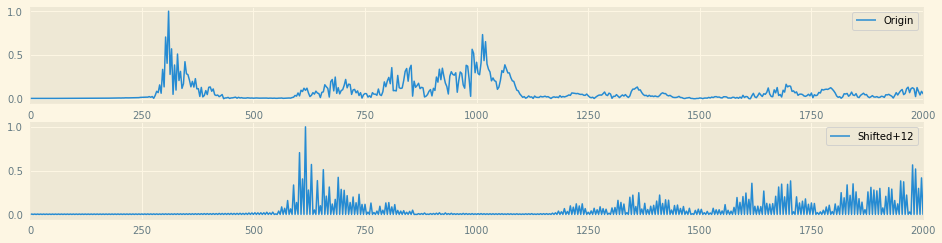

In [13]:
y_fft_shifted = np.zeros(x_fft.shape)
#x_fft[ len(x_fft) // 2 : ].astype(int)
#np.around(np.diff(x_fft[ len(x_fft) // 2 : ]), 11)
#y_fft_shifted[ len(x_fft) // 2 + 1 :: 2 ].shape
#y_fft[[ 3306, 3307, 3308 ]]
#len(y_fft) // 2
#y_fft[ len(y_fft) // 2 + 1 : (len(y_fft) // 4 + 1) * 3 ]
y_fft_shifted[ len(x_fft) // 2 + 1 ::   2  ] += y_fft[ len(x_fft) // 2 + 1 : (len(x_fft) // 4 + 1) * 3 ]
y_fft_shifted[ len(x_fft) // 2 - 1 :: (-2) ] += y_fft[ len(x_fft) // 2 + 1 : (len(x_fft) // 4 + 1) * 3 ]
with plt.rc_context({"figure.figsize": [ 16, 3.9 ]}):
    for each in zip([ 211, 212 ], [ y_fft, y_fft_shifted ], ["Origin", "Shifted+12"]):
        plt.subplot(each[0])
        plt.plot(x_fft, each[1], label=each[2])
        plt.legend()
        plt.xlim(0, 2000)
np.allclose(y_fft_shifted[ len(x_fft) // 2 + 1 : ], y_fft_shifted[ len(x_fft) // 2 - 1 :: (-1) ])

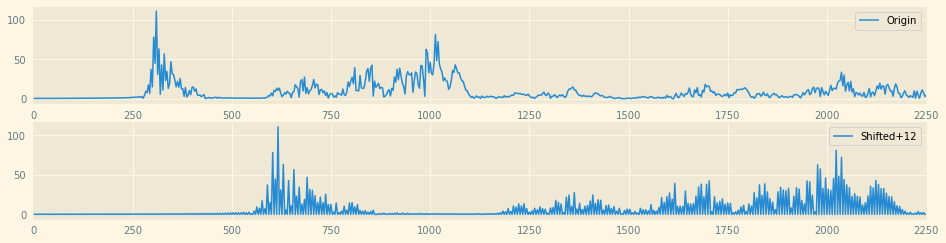

In [14]:
y_fft_complex_shifted = scipy.fft.fftshift(y_fft_complex)
ichika_la_ori = scipy.fft.ifft(y_fft_complex).real
y_fft_complex_expanded_shifted = np.zeros(x_fft.shape, dtype=np.complex128)
y_fft_complex_expanded_shifted[ len(x_fft) // 2 + 1 ::   2  ] += y_fft_complex_shifted[ len(x_fft) // 2 + 1 : (len(x_fft) // 4 + 1) * 3 ]
y_fft_complex_expanded_shifted[ len(x_fft) // 2 - 1 :: (-2) ] += y_fft_complex_shifted[ len(x_fft) // 2 + 1 : (len(x_fft) // 4 + 1) * 3 ]
y_fft_complex_expanded = scipy.fft.ifftshift(y_fft_complex_expanded_shifted)
ichika_la_new = scipy.fft.ifft(y_fft_complex_expanded).real
with plt.rc_context({"figure.figsize": [ 16, 3.9 ]}):
    for each in zip(
        [ 211, 212 ],
        [
            np.abs(y_fft_complex_shifted),
            np.abs(y_fft_complex_expanded_shifted)
        ],
        ["Origin", "Shifted+12"]
        ):
        plt.subplot(each[0])
        plt.plot(x_fft, each[1], label=each[2])
        plt.legend()
        plt.xlim(xmin=0, xmax=2250)
if False:
    scipy.io.wavfile.write("./output/ori.wav", fs, ichika_la_ori)
    scipy.io.wavfile.write("./output/new.wav", fs, ichika_la_new)